# <font color='yellow'> <center>Hackathon 2024</center></font>

## Importación y tratamiento de los datos
Primero se importa el modelo desde el csv a un arreglo de pandas

In [42]:
import pandas as pd

df = pd.read_csv("Sistecredito/Dataset_masked.csv")
print(df.shape[0])

1744667


Luego, se clasificarán las columnas con valores de texto en identificadores númericos

In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['CreditoCodigo', 'PersonaCodigo', 'DepartamentoResidencia', 'DepartamentoMayorFrecuenciaCompra',
                       'AlmacenMayorFrecuenciaPagoCodigo', 'AlmacenCreditoCodigo', 'AlmacenPerfilCodigo', 'DepartamentoCredito',
                       'storeIdEventoA', 'EventoA', 'userIdEventoB', 'RazonSocialUsuarioEventoB', 
                       'LocalizacionComercioCredito', 'StatusComercioCredito', 'TipoAlmacenCredito', 'TipoCliente']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

Ahora, el tratamiento de las columnas con fecha

In [44]:
df['FechaCreacion'] = pd.to_datetime(df['FechaCreacion']).astype('int64') // 10**9
df['FechaEventoA'] = pd.to_datetime(df['FechaEventoA']).astype('int64') // 10**9
df['FechaEventoB'] = pd.to_datetime(df['FechaEventoB']).astype('int64') // 10**9

La columna de Geolocalización se divide en Latitud y Longitud

In [45]:
df[['Latitud', 'Longitud']] = df['LocalizacionEventoB'].str.strip("[]").str.split(",", expand=True).astype(float)
df = df.drop(columns=['LocalizacionEventoB'])

Tratamiento para reemplazar los datos nulos

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

count = df.isnull().sum()
count

CreditoCodigo                        0
PersonaCodigo                        0
DepartamentoResidencia               0
DepartamentoMayorFrecuenciaCompra    0
AlmacenMayorFrecuenciaPagoCodigo     0
ValorPagosUltMes                     0
AlmacenCreditoCodigo                 0
AlmacenPerfilCodigo                  0
DepartamentoCredito                  0
FechaCreacion                        0
ValorFactura                         0
CupoTotal                            0
CupoDisponibleTotal                  0
storeIdEventoA                       0
FechaEventoA                         0
EventoA                              0
FechaEventoB                         0
userIdEventoB                        0
RazonSocialUsuarioEventoB            0
LocalizacionComercioCredito          0
StatusComercioCredito                0
FrecuenciaCreditosSemana             0
CantidadCreditosUltimaSemana         0
ValorAtipicoCliente                  0
ValorAtipicoComercio                 0
TipoAlmacenCredito       

La variable objetivo se elimina del dataset para el entrenamiento del modelo y se guarda en un arreglo

In [47]:
X = df.drop(columns=["Atipico"])
y = df["Atipico"]

Luego del tratamiento, el dataset queda así

In [48]:
df

,CreditoCodigo,PersonaCodigo,DepartamentoResidencia,DepartamentoMayorFrecuenciaCompra,AlmacenMayorFrecuenciaPagoCodigo,ValorPagosUltMes,AlmacenCreditoCodigo,AlmacenPerfilCodigo,DepartamentoCredito,FechaCreacion,...,StatusComercioCredito,FrecuenciaCreditosSemana,CantidadCreditosUltimaSemana,ValorAtipicoCliente,ValorAtipicoComercio,TipoAlmacenCredito,TipoCliente,Atipico,Latitud,Longitud
0,104.0,195241.0,21.0,28.0,2470.0,86923.0,22341.0,0.0,28.0,1.255133e+09,...,2.0,1.000000,3.0,350140.000000,5.630000e+05,1.0,0.0,0.0,5.258547,-73.038734
1,32.0,620995.0,28.0,28.0,1402.0,45347.0,9565.0,0.0,28.0,1.126483e+09,...,0.0,1.000000,4.0,579000.000000,4.995530e+05,1.0,0.0,0.0,5.258547,-73.038734
2,173.0,159048.0,1.0,28.0,6357.0,10113443.0,32304.0,0.0,28.0,1.198471e+09,...,2.0,1.098418,10.0,762438.300745,8.417151e+05,1.0,0.0,0.0,5.258547,-73.038734
3,174.0,159048.0,1.0,28.0,6357.0,10113443.0,18710.0,0.0,28.0,1.197521e+09,...,2.0,1.098418,10.0,762438.300745,8.417151e+05,1.0,0.0,0.0,5.258547,-73.038734
4,178.0,159048.0,1.0,28.0,6357.0,10113443.0,18710.0,0.0,28.0,1.197348e+09,...,2.0,1.098418,10.0,762438.300745,8.417151e+05,1.0,0.0,0.0,5.258547,-73.038734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744662,1744087.0,240941.0,33.0,33.0,12761.0,783153.0,17074.0,0.0,33.0,1.724068e+09,...,0.0,1.000000,7.0,339500.000000,7.651000e+05,1.0,0.0,0.0,4.530268,-75.657959
1744663,1744260.0,659994.0,32.0,32.0,18092.0,197031.0,29403.0,0.0,32.0,1.724068e+09,...,0.0,1.000000,3.0,319900.000000,3.990000e+05,1.0,0.0,0.0,5.258547,-73.038734
1744664,1744296.0,883479.0,8.0,8.0,1402.0,135343.0,21866.0,0.0,8.0,1.724068e+09,...,0.0,1.000000,1.0,181816.000000,8.668480e+05,1.0,0.0,0.0,5.258547,-73.038734
1744665,1744343.0,628649.0,28.0,28.0,10660.0,195608.0,34897.0,0.0,28.0,1.724069e+09,...,0.0,1.000000,1.0,626684.000000,6.540140e+05,0.0,0.0,0.0,5.258547,-73.038734


## Entrenamiento del modelo
Para el entrenamiento del modelo, se dividirán los datos en 70% de entrenamiento y 30% prueba

Como los datos a identificar son tan pocos, es importante realizar una normalización

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
X.value_counts()
y.value_counts()

Atipico
0.0    1744264
1.0    1744264
Name: count, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(
    X,
    y,
    train_size=0.70,
    random_state=10)
xTrain.shape,yTrain.shape


((2441969, 29), (2441969,))

For further testing, splitted test data again

In [51]:
xTest1, xTest2, yTest1, yTest2 = train_test_split(
    xTest,
    yTest,
    train_size=0.9,
    random_state=10
)

Dados los arreglos de datos creados en el paso anterior, se entrenará el modelo

In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    class_weight={0: 1, 1: 3}, 
    random_state=10)
model.fit(xTrain, yTrain)
print(model.score(xTrain, yTrain))
print(model.score(xTest1, yTest1))

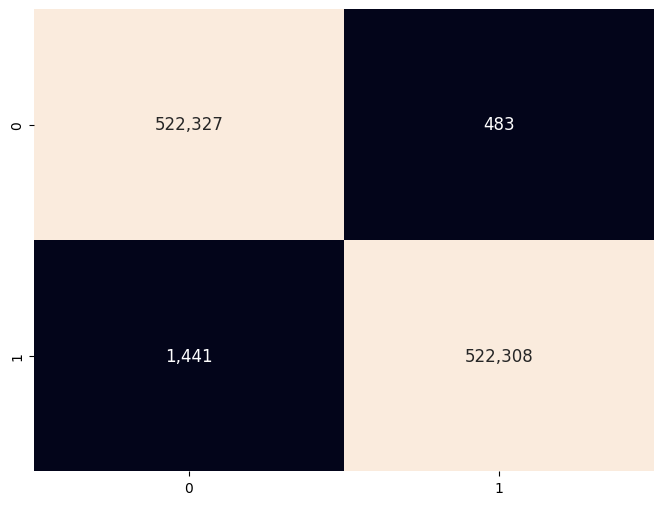

In [ ]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

plt.figure(figsize=(8,6))
cm = confusion_matrix(yTest1, model.predict(xTest1))

# Format the numbers with commas
cm_formatted = np.array([["{:,}".format(value) for value in row] for row in cm])

sns.heatmap(cm, annot=cm_formatted, fmt='', annot_kws={"fontsize":12}, cbar=False)
plt.show()

Now, we look at statistics from the model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ", accuracy_score(yTest1, model.predict(xTest1)))
print("Classification report: ", classification_report(yTest1, model.predict(xTest1)))

Accuracy:  0.9981615943296078
Classification report:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    522810
         1.0       1.00      1.00      1.00    523749

    accuracy                           1.00   1046559
   macro avg       1.00      1.00      1.00   1046559
weighted avg       1.00      1.00      1.00   1046559



Finally, save the model

In [ ]:
import joblib

joblib.dump(model, 'model.joblib')

['model.joblib']

## Testing the model
To double check the data above, we use the 10% of the test split and perform tests again

In [ ]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(yTest2, model.predict(xTest2))

# Format the numbers with commas
cm_formatted = np.array([["{:,}".format(value) for value in row] for row in cm])

sns.heatmap(cm, annot=cm_formatted, fmt='', annot_kws={"fontsize":12}, cbar=False)
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(yTest2, model.predict(xTest2)))
print("Classification report: ", classification_report(yTest2, model.predict(xTest2)))